# Travelling Salesman Problem (TSP)

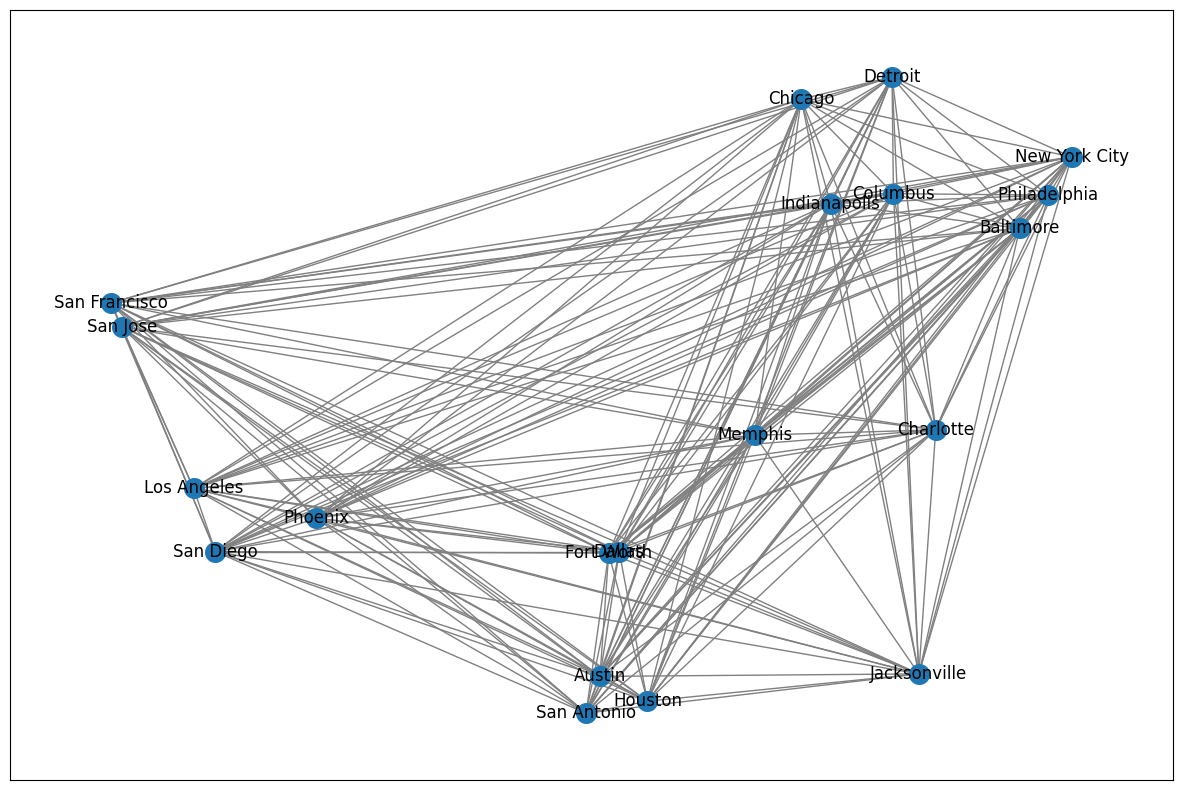

In [1]:
# Define the TSP problem
import pandas as pd
import networkx as nx
from collections import defaultdict
from haversine import haversine
import matplotlib.pyplot as plt

# latitude and longitude for the twenty largest U.S. cities
cities = {
    'New York City': (40.72, -74.00),
    'Los Angeles': (34.05, -118.25),
    'Chicago': (41.88, -87.63),
    'Houston': (29.77, -95.38),
    'Phoenix': (33.45, -112.07),
    'Philadelphia': (39.95, -75.17),
    'San Antonio': (29.53, -98.47),
    'Dallas': (32.78, -96.80),
    'San Diego': (32.78, -117.15),
    'San Jose': (37.30, -121.87),
    'Detroit': (42.33, -83.05),
    'San Francisco': (37.78, -122.42),
    'Jacksonville': (30.32, -81.70),
    'Indianapolis': (39.78, -86.15),
    'Austin': (30.27, -97.77),
    'Columbus': (39.98, -82.98),
    'Fort Worth': (32.75, -97.33),
    'Charlotte': (35.23, -80.85),
    'Memphis': (35.12, -89.97),
    'Baltimore': (39.28, -76.62)
}


# create a haversine distance matrix based on latitude-longitude coordinates
distance_matrix = defaultdict(dict)
for ka, va in cities.items():
    for kb, vb in cities.items():
        distance_matrix[ka][kb] = 0.0 if kb == ka else haversine((va[0], va[1]), (vb[0], vb[1])) 
        

# convert distance diccionary into a dataframe        
distances = pd.DataFrame(distance_matrix)
city_names=list(distances.columns)
distances=distances.values

# Visualize the cities and then route

# Create a graph
G=nx.Graph()

for ka, va in cities.items():
    for kb, vb in cities.items():
        G.add_weighted_edges_from({(ka,kb, distance_matrix[ka][kb])})
        G.remove_edges_from(nx.selfloop_edges(G))
        
fig, ax = plt.subplots(figsize=(15,10))

# reverse lat and long for correct visualization
reversed_dict = {key: value[::-1] for key, value in cities.items()}

# Create an independent shallow copy of the graph and attributes
H = G.copy()

 
# Draw the network
ax=nx.draw_networkx(
    H,
    pos=reversed_dict,
    with_labels=True,
    edge_color="gray",
    node_size=200,
    width=1,
)

plt.show()

# Solving TSP using SA

In [2]:
from optalgotools.algorithms import SimulatedAnnealing
from optalgotools.problems import TSP

In [3]:
pairwise_distances = distances
tsp_US = TSP(dists=pairwise_distances, gen_method='insert', init_method='greedy')

In [4]:
sa=SimulatedAnnealing(max_iter=10000, max_iter_per_temp=10000, initial_temp=10000000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9, debug=1)
sa.run(tsp_US)

Simulated annealing is initialized:
current value = 11748.784147692115, current temp=10000000
Simulated Annealing is done: 
curr iter: 242, curr best value: 16236.445887823173, curr temp:9.385226860283622e-05, curr best: sol: [0, 16, 6, 7, 3, 11, 9, 1, 8, 4, 14, 18, 19, 13, 15, 10, 2, 5, 12, 17, 0]


In [5]:
print(sa.s_best)

[0, 16, 6, 7, 3, 11, 9, 1, 8, 4, 14, 18, 19, 13, 15, 10, 2, 5, 12, 17, 0]
